# 1. Introdução
Este projeto tem como objetivo aplicar técnicas de aprendizado de máquina, utilizando dados clínicos para a detecção precoce da Doença de Alzheimer. A análise foca na seleção de variáveis mais relevantes por meio de Recursive Feature Elimination (RFE) com Random Forest e no desenvolvimento de modelos baseados em Random Forest e Redes Neurais Artificiais (ANNs).


# 2. Instalação de Bibliotecas e Carregamento do Dataset
Nesta etapa, são carregadas as bibliotecas necessárias e o dataset é importado para análise.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Caminho do arquivo CSV
data = pd.read_csv('/home/sanmartin/Área de trabalho/AlzheimerDetection_ML/alzheimers_disease_data.csv')
data.head().T


,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


# 3. Leitura do Dataset e Tratamento de Dados
Nesta etapa, são explorados os dados e tratadas inconsistências, como dados duplicados ou colunas desnecessárias.


In [3]:
# Informações gerais
data.info()

# Verificar número de linhas e colunas
print(f"Shape: {data.shape}")

# Contar duplicatas
print(f"Duplicatas: {sum(data.duplicated())}")

# Verificar valores nulos
print(data.isnull().sum())

# Remover colunas irrelevantes
data.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

# Estatísticas descritivas
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# 4. Análise Exploratória de Dados
Visualização da distribuição das variáveis e correlação entre elas, com foco nas variáveis numéricas e categóricas.


Análise de Distribuição de Diagnósticos:

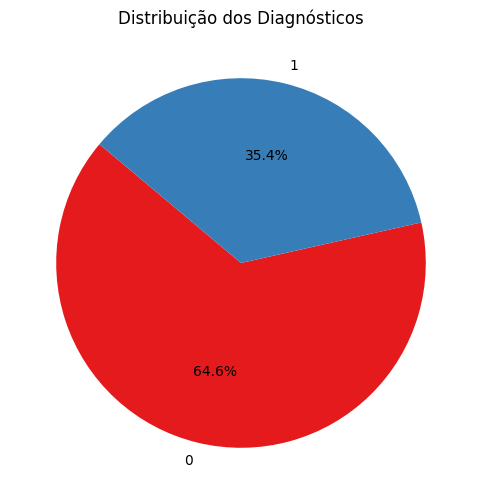

In [4]:
categories = [0, 1]
counts = data.Diagnosis.value_counts().tolist()

colors = sns.color_palette("Set1")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribuição dos Diagnósticos')
plt.show()


Distribuição das Variáveis Numéricas em Relação ao Diagnóstico de Alzheimer

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


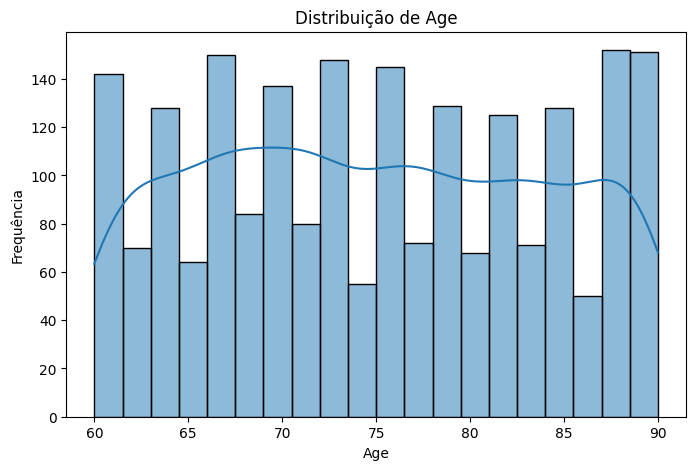

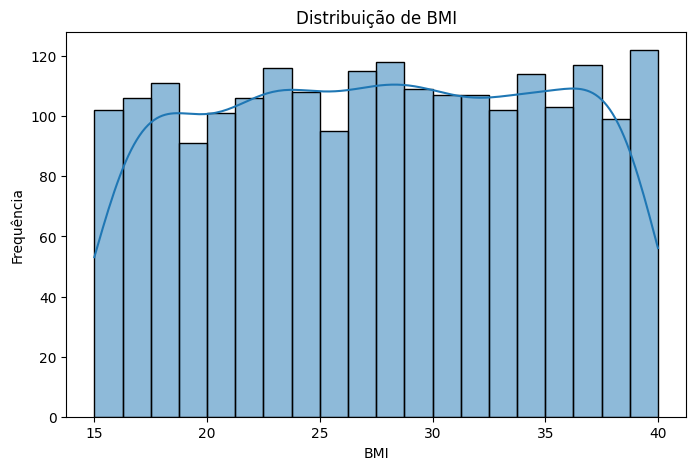

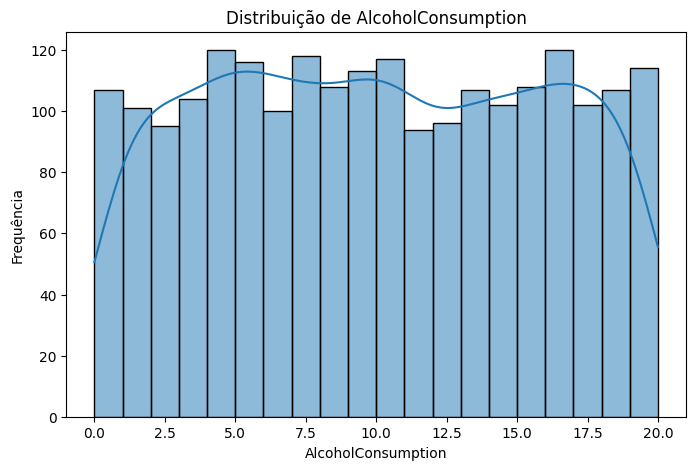

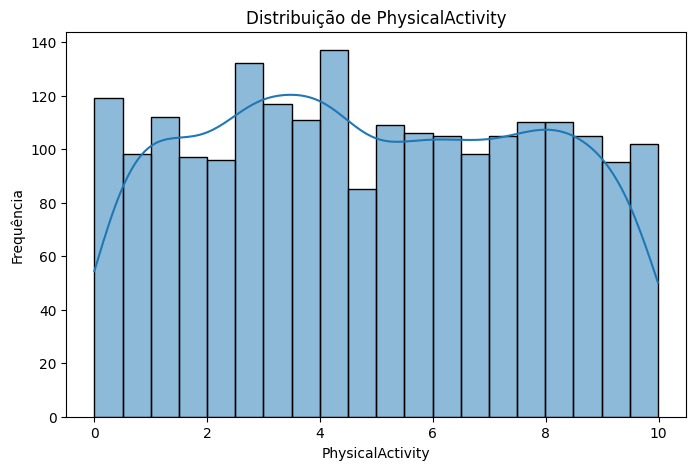

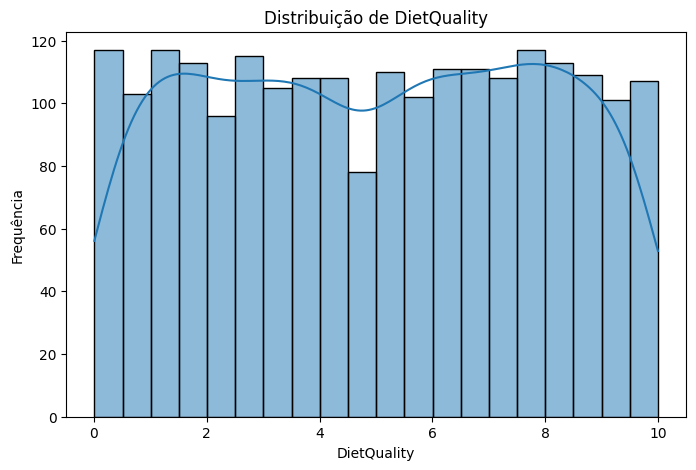

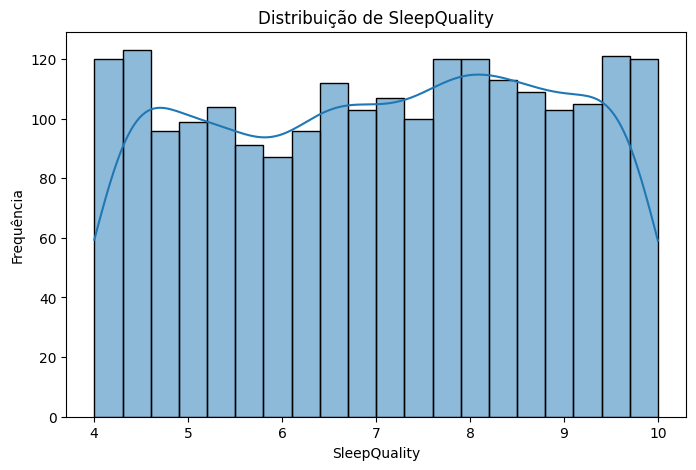

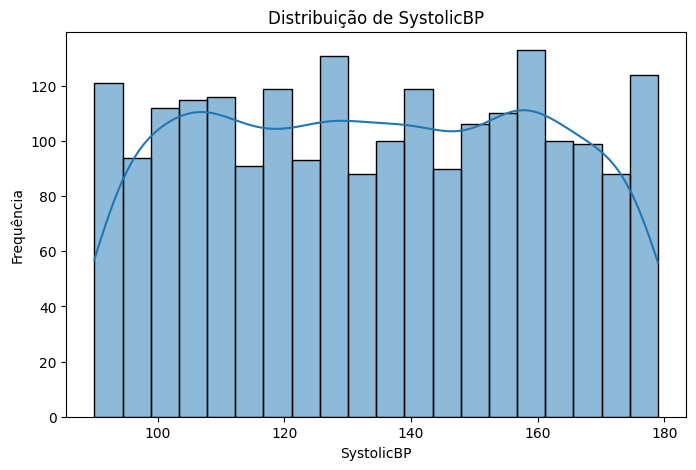

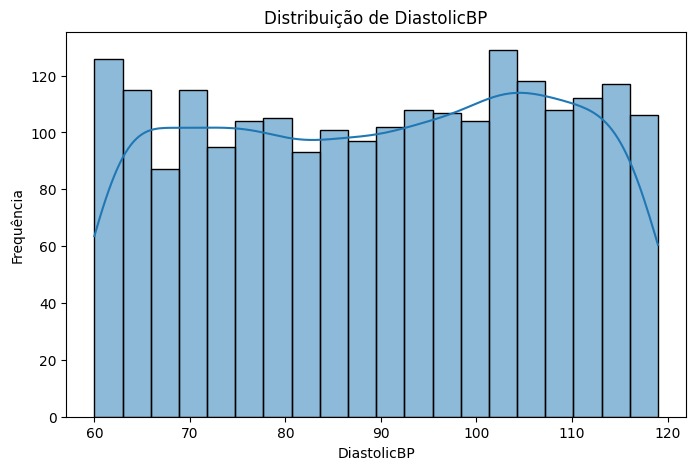

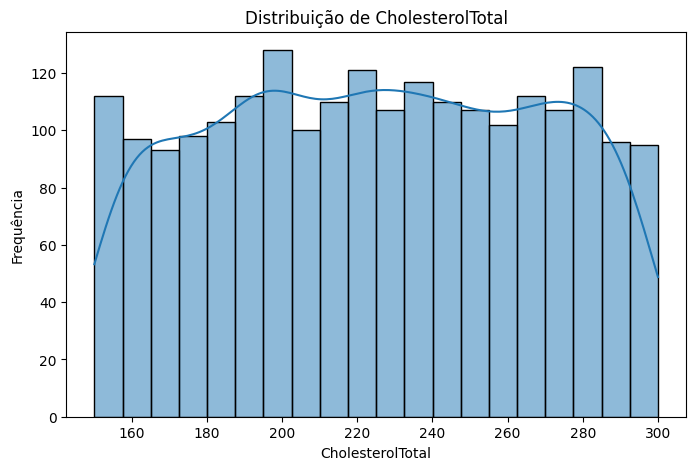

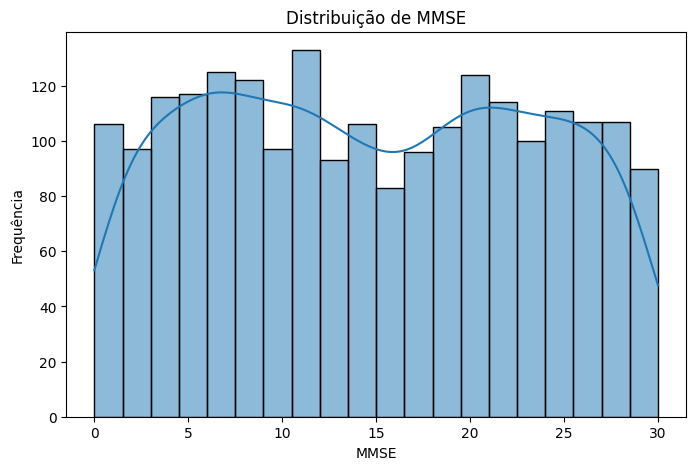

In [5]:
print(data.columns)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if data[column].isnull().any():
        print(f"{column} contém valores nulos.")

numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'MMSE']  

for column in numerical_columns:
    if column in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data=data, x=column, kde=True, bins=20)
        plt.title(f'Distribuição de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.show()
    else:
        print(f"Coluna {column} não encontrada no DataFrame.")

Distribuição das Variáveis Categóricas em Relação ao Diagnóstico de Alzheimer

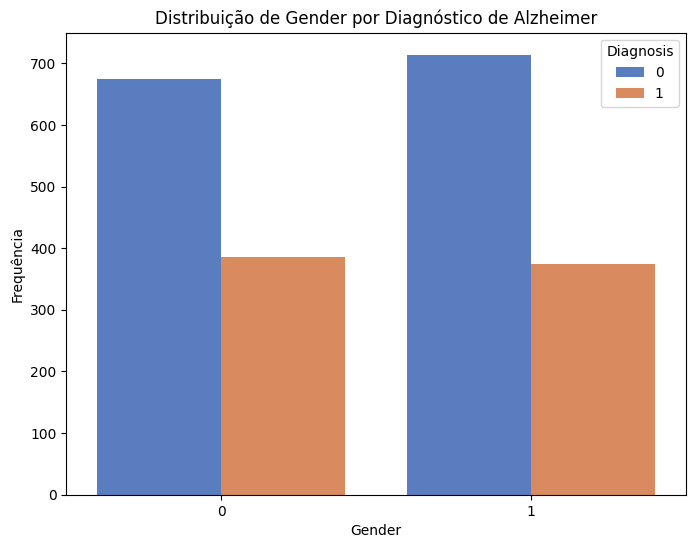

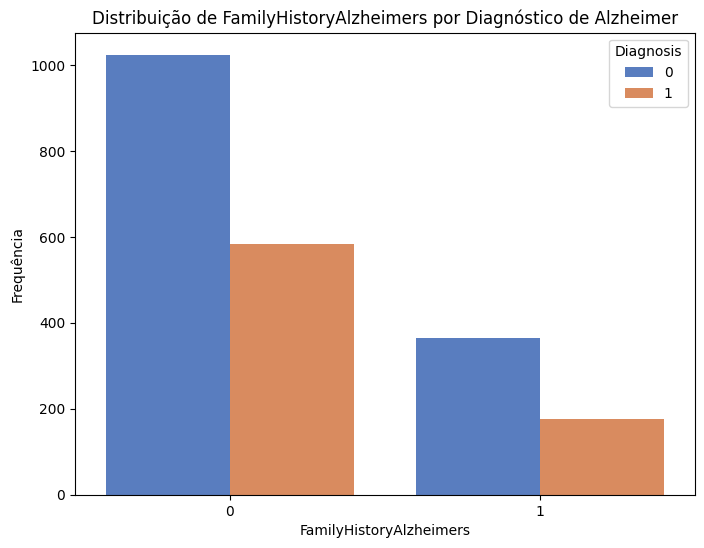

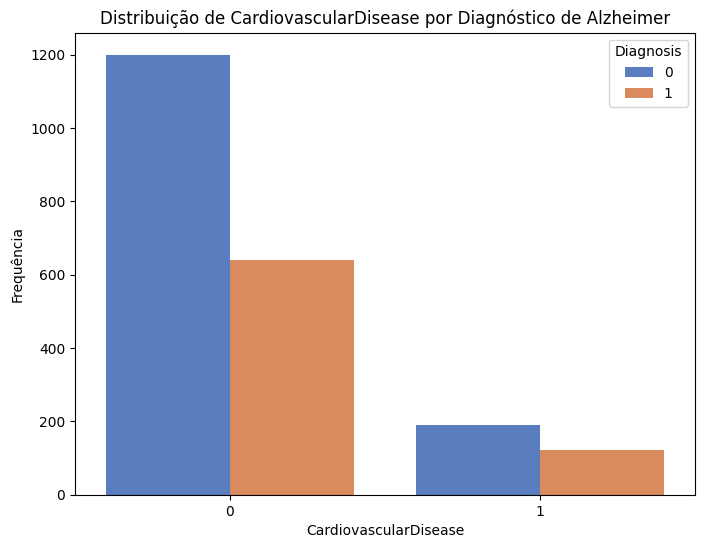

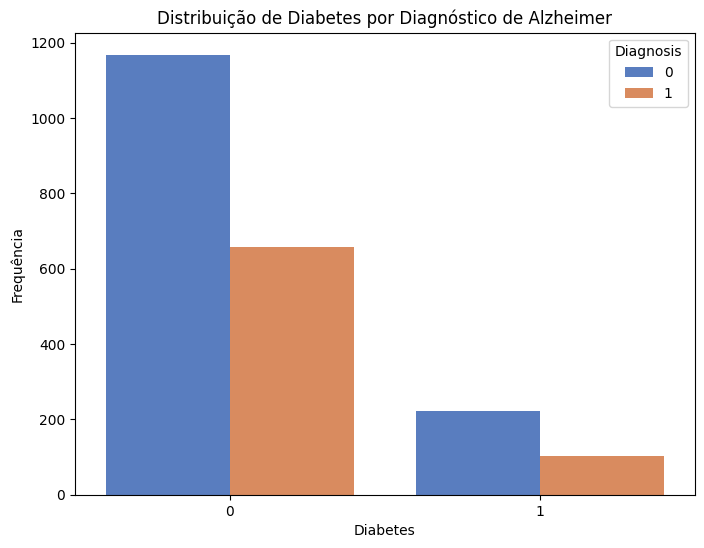

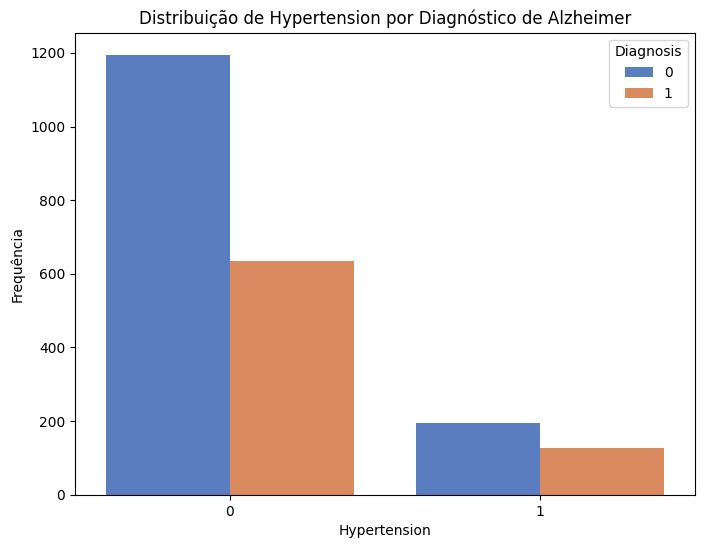

In [6]:
# Lista de variáveis categóricas para análise
categorical_vars = ['Gender', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Hypertension']

for var in categorical_vars:
    if var in data.columns: 
        plt.figure(figsize=(8, 6))
        sns.countplot(x=var, hue='Diagnosis', data=data, palette='muted')
        plt.title(f'Distribuição de {var} por Diagnóstico de Alzheimer')
        plt.xlabel(var)
        plt.ylabel('Frequência')
        plt.legend(title='Diagnosis', loc='upper right')
        plt.show()
    else:
        print(f"Coluna '{var}' não encontrada no DataFrame.")


Boxplots das Variáveis Numéricas:

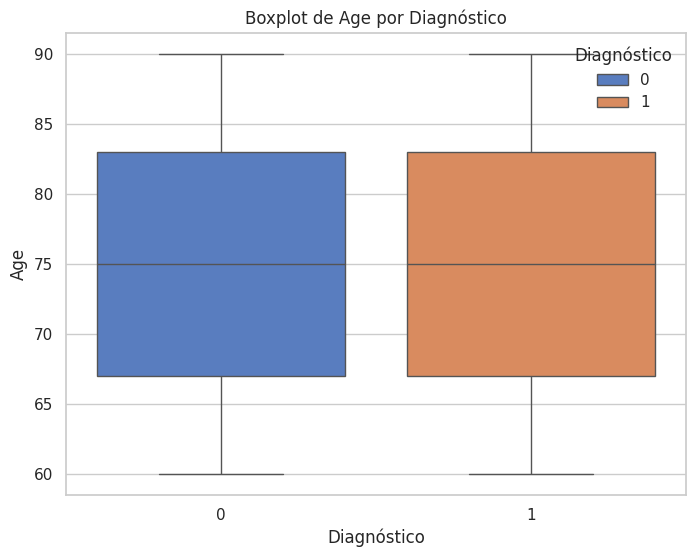

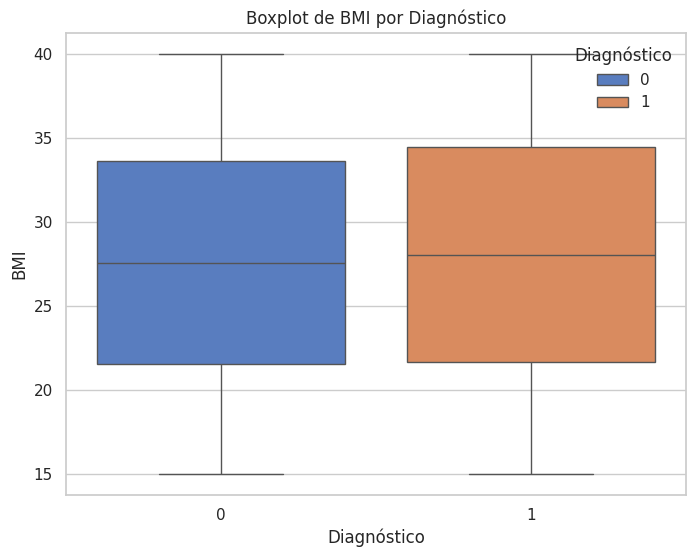

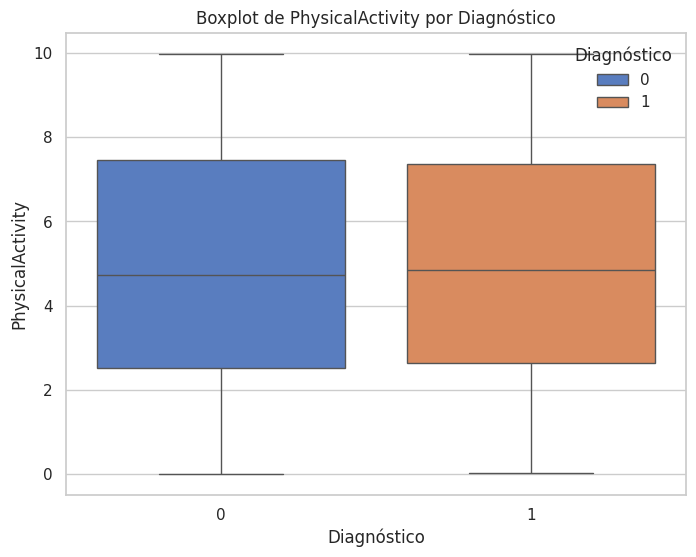

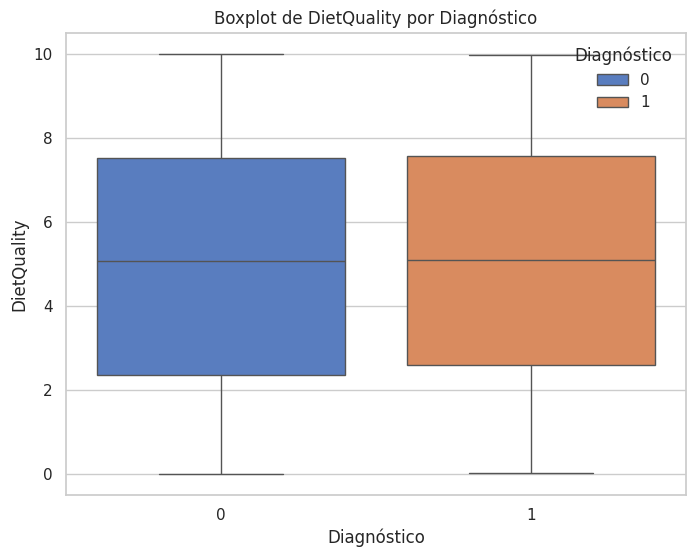

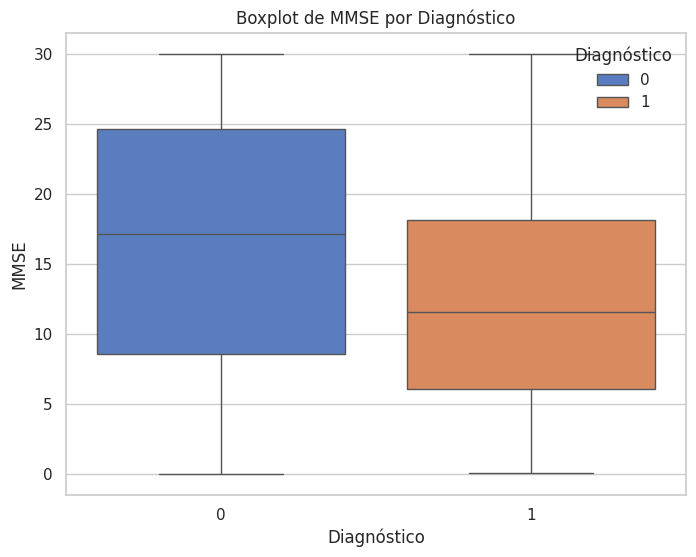

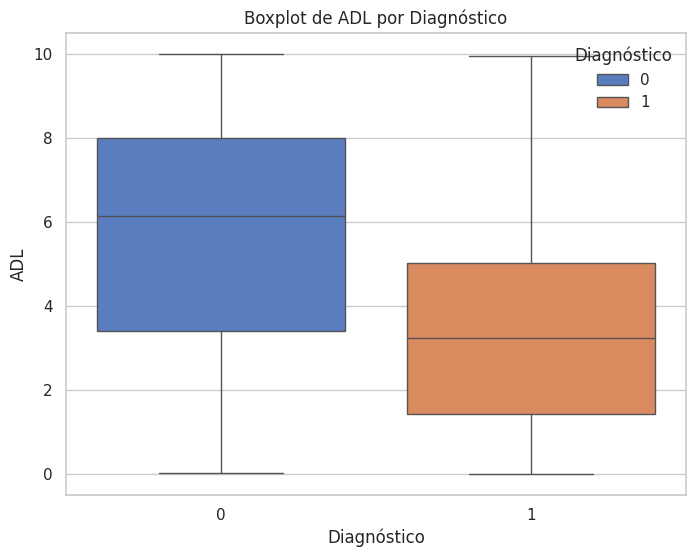

In [13]:
numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'MMSE', 'ADL']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diagnosis', y=column, data=data, hue='Diagnosis', palette='muted')
    plt.title(f'Boxplot de {column} por Diagnóstico')
    plt.xlabel('Diagnóstico')
    plt.ylabel(column)
    plt.legend(title='Diagnóstico', loc='upper right', frameon=False)
    plt.show()


# 5. Seleção de Variáveis com Recursive Feature Elimination (RFE)
Aplicação do RFE utilizando Random Forest para selecionar as variáveis mais relevantes para a modelagem.


In [14]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras e alvo
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Aplicar RFE
rfe_selector = RFE(estimator=rf_model, n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_train, y_train)

# Identificar variáveis mais importantes
selected_features = X.columns[rfe_selector.support_]
print("Variáveis mais relevantes:", selected_features)


Variáveis mais relevantes: Index(['PhysicalActivity', 'DietQuality', 'SleepQuality', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL'],
      dtype='object')


# 6. Modelagem e Análise
Construção de modelos de Random Forest e Redes Neurais Artificiais (ANNs) utilizando apenas as variáveis mais relevantes.


Random Forest:

In [15]:
# Reajustar os dados com variáveis relevantes
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Treinar o modelo Random Forest
rf_model.fit(X_train_selected, y_train)

# Avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf_model.predict(X_test_selected)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[272   5]
 [ 17 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.89      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430


Accuracy Score: 0.9488372093023256


Redes Neurais Artificiais (ANNs):

In [16]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Construir o modelo ANN
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar o modelo
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Avaliação no conjunto de teste
test_loss, test_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50


/home/sanmartin/Área de trabalho/AlzheimerDetection_ML/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6566 - loss: 0.6040 - val_accuracy: 0.7965 - val_loss: 0.4558
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.3858 - val_accuracy: 0.8140 - val_loss: 0.4121
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3320 - val_accuracy: 0.8430 - val_loss: 0.4017
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3263 - val_accuracy: 0.8256 - val_loss: 0.3959
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8885 - loss: 0.2823 - val_accuracy: 0.8372 - val_loss: 0.3980
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2619 - val_accuracy: 0.8401 - val_loss: 0.3801
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8926 - loss: 0.2775 - val_accuracy: 0.8488 - val_loss: 0.3804
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2676 - val_accuracy: 0.8430 - val_loss: 0.3935
Epo

# 7. Visualização dos Resultados
Curvas de aprendizado e importância das variáveis nos modelos treinados.


Importância das Variáveis no Random Forest:

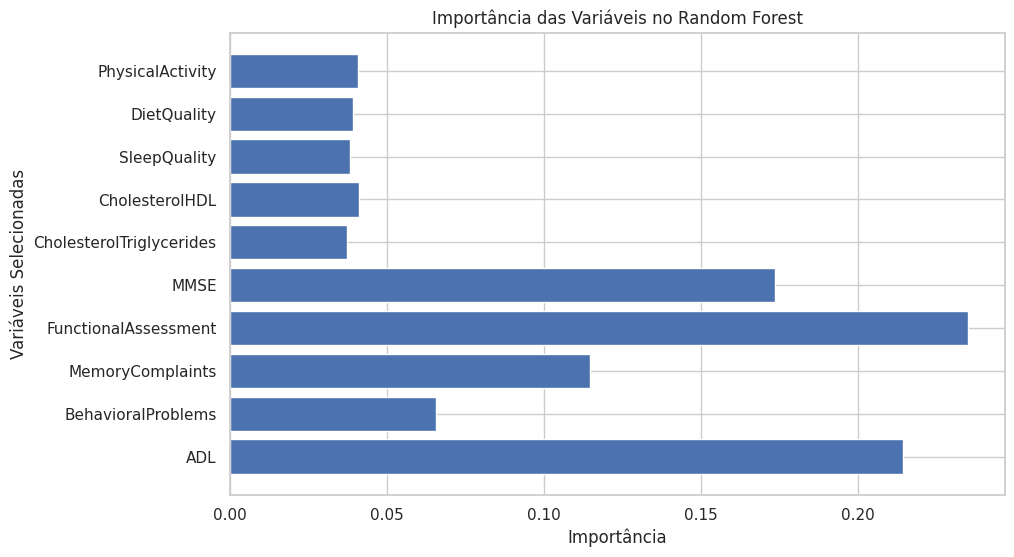

In [11]:
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances)
plt.xlabel('Importância')
plt.ylabel('Variáveis Selecionadas')
plt.title('Importância das Variáveis no Random Forest')
plt.gca().invert_yaxis()
plt.show()


Curvas de Aprendizado do ANN:

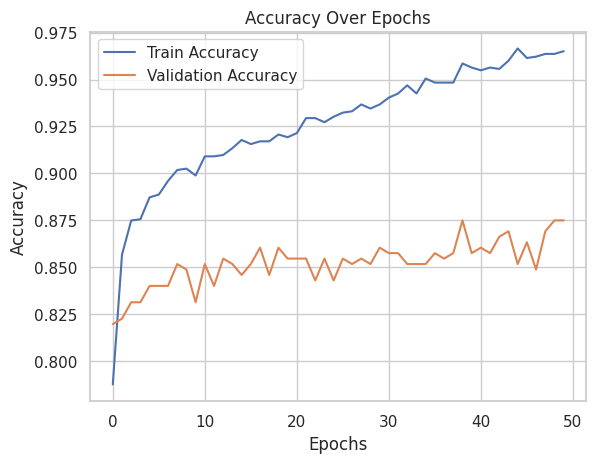

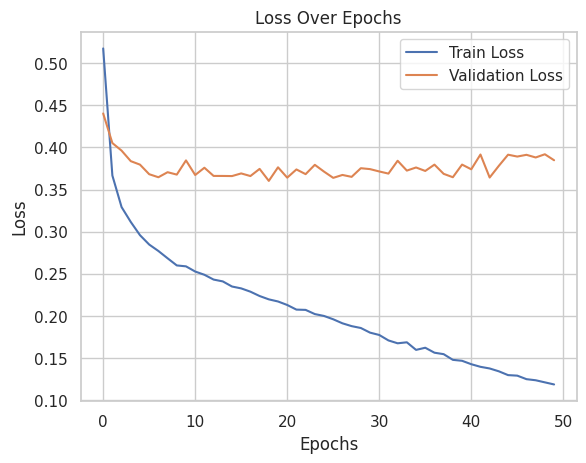

In [12]:
# Plotando a acurácia
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plotando a perda
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()
